In [1]:
import os
import sys
from ultralytics import YOLO
import cv2
from pathlib import Path
parent_dir = os.path.abspath('../../')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

In [2]:
BASE_PATH = Path("../../")

In [3]:
# Load YOLO model
def load_yolo_model(model_path):
    model = YOLO(model_path)
    return model

# Run YOLO inference
def run_yolo_inference(model, image_path):
    results = model(image_path)
    return results

In [4]:
from utils.image_handling import pad_bbox


def crop_and_resize(image, bbox, target_size=(128, 128)):
    # Crop the image using the bounding box
    x, y, w, h = pad_bbox(bbox)
    cropped_image = image[y:y+h, x:x+w]
    # Resize the cropped image to the target size
    resized_image = cv2.resize(cropped_image, (target_size[0], target_size[1]))

    return resized_image

..\..\datasets\lm\test\000011\rgb\000343.png
[     345.54      101.57      423.21      220.39]
(340, 96, 87, 128)


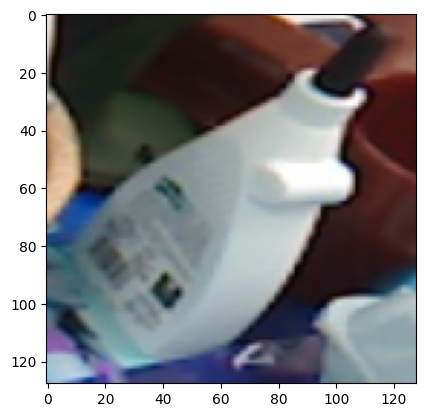

In [7]:

import random

from matplotlib import pyplot as plt

from utils.image_handling import pad_bbox


obj_id = 11  # Change as needed
image_id = 343  # Change as needed

# Define paths
model_path = BASE_PATH /"models/yolo/yolo-lm.pt"
image_path = BASE_PATH / f"datasets/lm/test/{obj_id:06d}/rgb/{image_id:06d}.png"

print(image_path)
# Load model
yolo_model = load_yolo_model(model_path)

# Run inference
results = yolo_model.predict(source=image_path, classes=[obj_id-1], save=False, verbose=False)
boxes = results[0].boxes.xyxy.cpu().numpy()
print(boxes[0])
x1, y1, x2, y2 = boxes[0]

bbox = pad_bbox((x1, y1, x2-x1, y2-y1))
print(bbox)
# Display results
results[0].show()
image = crop_and_resize(results[0].orig_img, bbox)
plt.imshow(image)
plt.show()
